In [1]:
import cartopy
import xarray as xr
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
%matplotlib inline

In [3]:
file_in = 'oiv2mon.202012.grb'
# file_in = 'https://www.ncei.noaa.gov/thredds/dodsC/model-gfs-004-files/202109/20210903/gfs_3_20210903_1800_006.grb2'

In [4]:
with xr.open_dataset(file_in, engine='cfgrib') as dset:
    print(dset)

<xarray.Dataset>
Dimensions:     (latitude: 180, longitude: 360)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude   (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    valid_time  datetime64[ns] ...
Data variables:
    t           (latitude, longitude) float32 ...
    p3091       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2021-09-17T16:44 GRIB to CDM+CF via cfgrib-0.9.9...


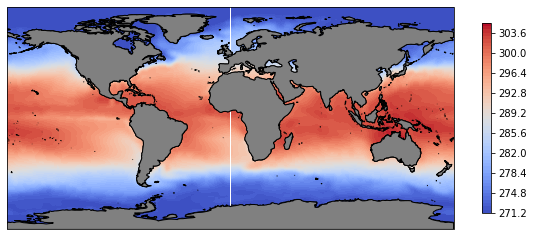

In [5]:
fig = plt.figure(figsize=(10, 10))

ax = plt.axes(projection=cartopy.crs.PlateCarree())

# Máscara sobre os continentes
ax.add_feature(cartopy.feature.LAND, zorder=50, edgecolor='k', facecolor='gray')

plt.contourf(
    dset.longitude, 
    dset.latitude, 
    dset['t'], 60, 
    transform=cartopy.crs.PlateCarree(), 
    cmap=plt.cm.coolwarm
)

# contorno dos estados

states = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_1_states_provinces_shp'
    )
ax.add_feature(states, edgecolor='k')

# contorno dos países

countries = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    scale='50m', facecolor='none',
    name='admin_0_countries'
    )
ax.add_feature(countries, edgecolor='k')

plt.colorbar(shrink=0.35)

plt.show()